In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [15]:
import astroML.time_series as aml
import numpy as np
from astroML.utils import check_random_state
np.set_printoptions(threshold=np.nan)
import scipy as sp
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from astropy.table import Table, Column, MaskedColumn
import astropy.io.ascii as ascii
import random as rnd
import pandas as pd
# the error message below requires a C compiler, not relevant currently as it seems

In [16]:
import sys
sys.path.append('/Amelias-MBP/fox/')
sys.path.append('/Amelias-MBP/fox/undergrad/research1819/astroML/astroML/utils') # for DRW code and get_random_state
import astroML as aml # not to be confused with fml
# how to get this notebook to know about the specific file in astroML that i need to use functions from?

In [19]:
def check_random_state(seed): # this is from github: astroML/astroML/utils.py
    """Turn seed into a np.random.RandomState instance
    If seed is None, return the RandomState singleton used by np.random.
    If seed is an int, return a new RandomState instance seeded with seed.
    If seed is already a RandomState instance, return it.
    Otherwise raise ValueError.
    """
    if seed is None or seed is np.random:
        return np.random.mtrand._rand
    if isinstance(seed, (int, np.integer)):
        return np.random.RandomState(seed)
    if isinstance(seed, np.random.RandomState):
        return seed
    raise ValueError('%r cannot be used to seed a numpy.random.RandomState'
                     ' instance' % seed)
    
def generate_damped_RW(t_rest, tau=300., z=2.0, # this is the original version of the function unedited
                       xmean=0, SFinf=0.3, random_state=None):
    #  Xmean = b * tau
    #  SFinf = sigma * sqrt(tau / 2)
    t_rest = np.atleast_1d(t_rest) # making sure dimension is right

    if t_rest.ndim != 1:
        raise ValueError('t_rest should be a 1D array')

    random_state = check_random_state(random_state) 

    N = len(t_rest) # defining how long input array is

    t_obs = t_rest * (1. + z) / tau # account for redshift

    x = np.zeros(N) # make an empty array with the same length as input array
    x[0] = random_state.normal(xmean, SFinf) 
    E = random_state.normal(0, 1, N) 

    for i in range(1, N):
        dt = t_obs[i] - t_obs[i - 1] 
        x[i] = (x[i - 1]
                - dt * (x[i - 1] - xmean)
                + np.sqrt(2) * SFinf * E[i] * np.sqrt(dt))

    return x

In [27]:
initial_days = np.arange(3650) # 10 years

In [28]:
drw_init_days = generate_damped_RW(initial_days, tau = 300, xmean=25) # re-evaluate this cell to change the DRW

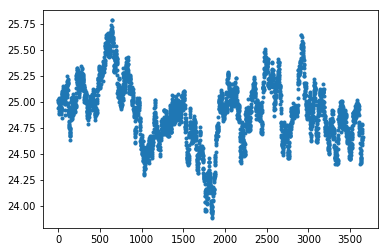

In [29]:
plt.plot(drw_init_days, '.') # expand this to see DRW
plt.show()

In [33]:
for i in range(10):
    initial_days[200+365*i:365+365*i]=-100 # changing 200 and 365 to other numbers can change when and for how long 
    # the given system is observable

In [35]:
initial_days[rnd.sample(range(3650),1100)]=-100 # 1100 corresponds to on average 60 days being removed from every 
# remaining days 

In [111]:
all_observation = [np.arange(3650),initial_days,drw_init_days]
all_observation = np.array(all_observation)

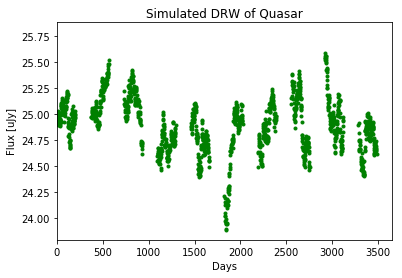

In [113]:
plt.plot(all_observation[1],all_observation[2],'.', color='g')
plt.xlim(0,3650)
plt.xlabel('Days')
plt.ylabel('Flux [uJy]')
plt.title('Simulated DRW of Quasar')
plt.show()
# why is this taking so long to run?  also (maybe related) if color is not specified, every data point
# is a different color

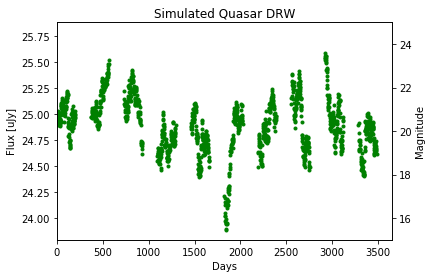

In [114]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.plot(all_observation[1], all_observation[2], '.', color='g')
ax1.set_ylabel('Flux [uJy]')
ax1.set_xlim(0,3650)
ax1.set_xlabel('Days')
ax2.invert_yaxis()
ax2.set_ylim(15,25)
ax2.set_ylabel('Magnitude')
plt.title('Simulated Quasar DRW')
plt.show()

In [77]:
sin = 0.1*np.sin(2 * np.pi * np.arange(3650) * (1/300)) 

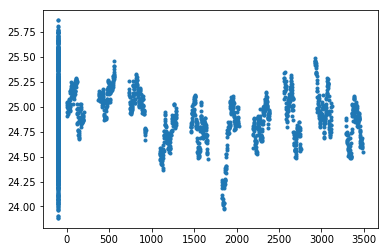

In [115]:
plt.plot(all_observation[1],sin+all_observation[2], '.')
plt.show()

In [116]:
noise = np.random.normal(0,0.1,3650)
noisy_sig = all_observation[2] + noise

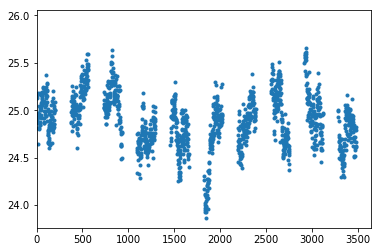

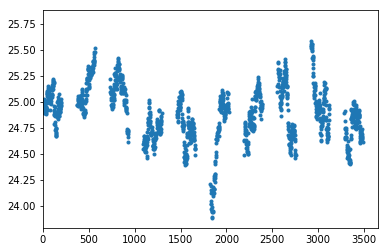

In [117]:
plt.plot(all_observation[1],all_observation[2]+noise,'.')
plt.xlim(0,3650)
plt.show()
plt.plot(all_observation[1],all_observation[2],'.')
plt.xlim(0,3650)
plt.show()

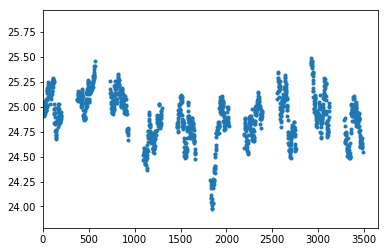

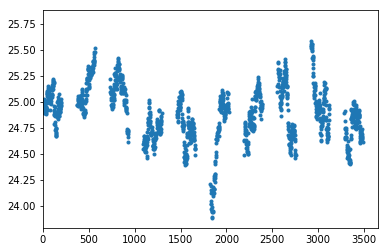

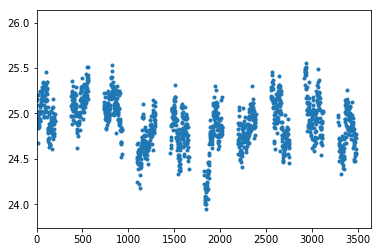

In [118]:
plt.plot(all_observation[1],all_observation[2]+sin,'.')
plt.xlim(0,3650)
plt.show()
plt.plot(all_observation[1],all_observation[2],'.')
plt.xlim(0,3650)
plt.show()
plt.plot(all_observation[1],all_observation[2]+noise+sin,'.')
plt.xlim(0,3650)
plt.show()

In [123]:
def noise_and_sine(drw,prd,noise_amp,sin_amp): 
    '''
    Input
    -----
    drw = 3D numpy array 
    prd = characteristic timescale from DRW 
    noise_amp = amplitude of noise
    sin_amp = amplitude of sine
    '''
    days = len(drw)
    dates = np.arange(days)
    sin = sin_amp*np.sin(2 * np.pi * dates * prd)
    noise = np.random.normal(0,noise_amp,days)
    new_drw = drw[2] + sin + noise
    plt.plot(drw[1],new_drw)
    return new_drw

In [124]:
noise_and_sine(all_observation,375,0.1,0.1)

ValueError: operands could not be broadcast together with shapes (3650,) (3,) 